In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

folder_path = "/Users/yukiharuta/Desktop/Temp-Data/Doping-for-pn/Keithley/240214_Bi-doped_MAPbBr3_IV"
csv_list = glob.glob(f'{folder_path}/*.csv')
csv_list.sort()

df_list, name_list = [], []
i = 0

for csv in csv_list:
    df = pd.read_csv(csv)
    df_list.append(df)
    name = os.path.basename(csv)
    name_list.append(name)
    print('{:02d}: {}'.format(i, name))
    i += 1

00: 240209_Bi05%_Bi-negative-F.csv
01: 240209_Bi05%_Bi-negative-R.csv
02: 240209_Bi05%_Bi-positive-F.csv
03: 240209_Bi05%_Bi-positive-R.csv
04: 240209_Bi10%_Bi-negative-F.csv
05: 240209_Bi10%_Bi-negative-R.csv
06: 240209_Bi10%_Bi-positive-F.csv
07: 240209_Bi10%_Bi-positive-R.csv
08: 240209_Bi15%_Bi-negative-F.csv
09: 240209_Bi15%_Bi-negative-R.csv
10: 240209_Bi15%_Bi-positive-F.csv
11: 240209_Bi15%_Bi-positive-R.csv
12: 240209_Bi20%_Bi-negative-F.csv
13: 240209_Bi20%_Bi-negative-R.csv
14: 240209_Bi20%_Bi-positive-F.csv
15: 240209_Bi20%_Bi-positive-R.csv


0.007550941065280191


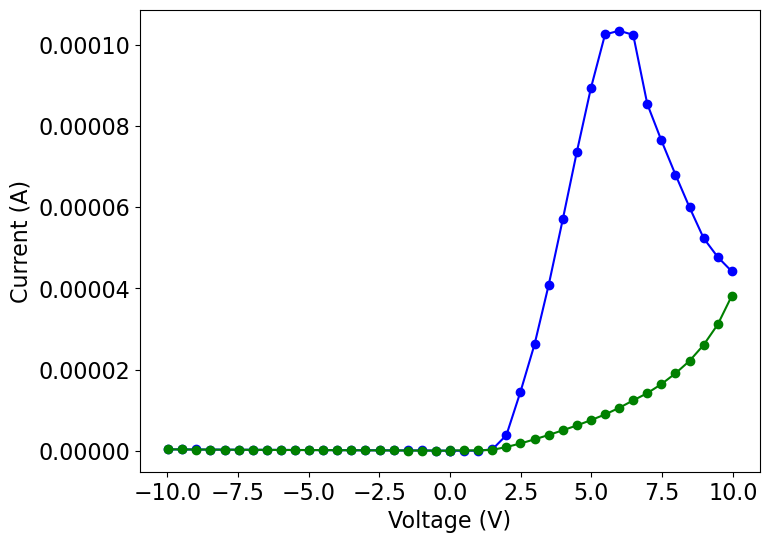

In [47]:
plot_list = [0,1,2,3]
plot_list = [n+12 for n in plot_list]
# plot_list = [14,15]

# Make a figure
fig = plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 16

for plot_id in plot_list:
    name = name_list[plot_id]
    df = df_list[plot_id]
    X = df['Voltage (V)'].to_list()
    Y = df['Current (A)'].to_list()
    Y = [abs(n) for n in Y]
    if "positive" in name:
        X = [-n for n in X]
    if "-F" in name:
        color = 'blue'
    elif "-R" in name:
        color = 'green'
    plt.plot(X,Y,linestyle='-', marker='o',label=name_list[plot_id], color=color)
    
    if "positive-F" in name:
        I_at_10 = Y[-1]
    if "negative-F" in name:
        I_at_10_ = Y[-1]    
        
print(I_at_10/I_at_10_)

# Design
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')
# plt.yscale('log')
# plt.legend(loc='best', frameon = False)
# plt.savefig('Bi5%.jpg', dpi=1200, bbox_inches='tight')
plt.show()

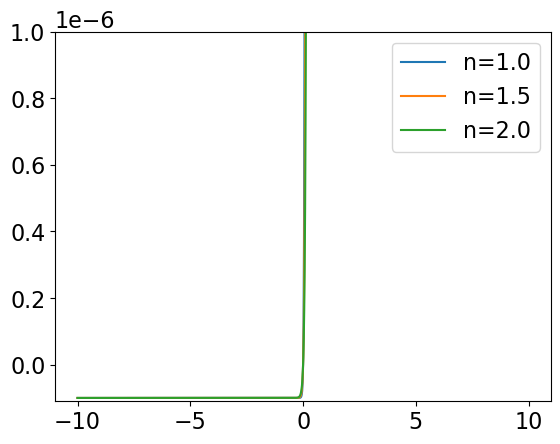

In [94]:
import numpy as np

X = np.arange(-10,10,0.01)

def diode_current(I0,n,T,V):
    q = 1.60218e-19 # C
    k = 1.380649e-23 # Boltzman, J/K
    
    I = I0 * (np.exp(q*V/(n*k*T))-1)
    
    return I

I0 = 1e-7 #A
T = 300 # K

n_s = np.arange(1,2.5,0.5)

for n in n_s:
    Y = [diode_current(I0,n,T,V) for V in X]

    plt.plot(X,Y,label=f'n={n}')

plt.ylim(I0*(-1.1),1e-6)
plt.legend()